# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:

- Determine if an interaction term would be useful for a specific model or set of data
- Create interaction terms out of independent variables in linear regression
- Interpret coefficients of linear regression models that contain interaction terms

## Ames Housing Data

Once again we will be using the Ames Housing dataset, where each record represents a home sale:

In [7]:
# Run this cell without changes
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

# Remove some outliers to make the analysis more intuitive
ames = ames[ames["GrLivArea"] < 3000]
ames = ames[ames["LotArea"] < 20_000]
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In particular, we'll use these numeric and categorical features:

In [9]:
# Run this cell without changes
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

## Build a Baseline Model

### Initial Data Preparation

Use all of the numeric and categorical features described above. (We will call this the "baseline" model because we are making a comparison with and without an interaction term. In a complete modeling process you would start with a simpler baseline.)

One-hot encode the categorical features (dropping the first), and center (subtract the mean) from the numeric features.

In [11]:
# Your code here - prepare data for modeling

# Selecting numeric and categorical columns
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

# Center numeric features
X_numeric = ames[numeric] - ames[numeric].mean()

# One-hot encode categorical features, dropping the first category in each
X_categorical = pd.get_dummies(ames[categorical], drop_first=True)

# Combining numeric and encoded categorical features
X_baseline = pd.concat([X_numeric, X_categorical], axis=1)

# Target variable
y = ames["SalePrice"]

# Display Output 
X_baseline.head()

,LotArea,1stFlrSF,GrLivArea,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,-865.191977,-284.866046,231.095272,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,284.808023,121.133954,-216.904728,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1934.808023,-220.866046,307.095272,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,234.808023,-179.866046,238.095272,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,4944.808023,4.133954,719.095272,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


### Build a Model with No Interaction Terms

Using the numeric and categorical features that you have prepared, as well as `SalePrice` as the target, build a StatsModels OLS model.

In [13]:
# Your code here - import relevant libraries and build model

import statsmodels.api as sm

# Converting all columns to float type
X_baseline_clean = X_baseline.astype(float)

# Adding a constant
X_baseline_const = sm.add_constant(X_baseline_clean)

# Fitting the model
model_baseline = sm.OLS(y, X_baseline_const).fit()

# Model summary
print(model_baseline.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.6
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:04:33   Log-Likelihood:                -16370.
No. Observations:                1396   AIC:                         3.280e+04
Df Residuals:                    1365   BIC:                         3.297e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.544e+05 

### Evaluate the Model without Interaction Terms

Describe the adjusted R-Squared as well as which coefficients are statistically significant. For now you can skip interpreting all of the coefficients.

### Your code here - evaluate the baseline model

**Adjusted R-squared = 0.827**
- This means that approximately 82.7% of the variation in SalePrice is explained by the model, after adjusting for the number of predictors.
- This is a strong fit, especially for a housing price model, indicating that the selected features (without interaction terms) are doing a good job in explaining sale price variability.

#### Your written answer here

The model overall explains about 83% of the variance in sale price.

We'll used the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for the intercept as well as all continuous variables are statistically significant
Coefficients for KitchenQual are statistically significant
Coefficients for most values of Neighborhood are statistically significant, while some are not. In this context the reference category was Blmngtn, which means that neighborhoods with statistically significant coefficients differ significantly from Blmngtn whereas neighborhoods with coefficients that are not statistically significant do not differ significantly from Blmngtn


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall explains about 83% of the variance in sale price.

We'll used the standard alpha of 0.05 to evaluate statistical significance:
    
* Coefficients for the intercept as well as all continuous variables are statistically significant
* Coefficients for `KitchenQual` are statistically significant
* Coefficients for most values of `Neighborhood` are statistically significant, while some are not. In this context the reference category was `Blmngtn`, which means that neighborhoods with statistically significant coefficients differ significantly from `Blmngtn` whereas neighborhoods with coefficients that are not statistically significant do not differ significantly from `Blmngtn`

</details>

## Identify Good Candidates for Interaction Terms

### Numeric x Categorical Term

Square footage of a home is often worth different amounts depending on the neighborhood. So let's see if we can improve the model by building an interaction term between `GrLivArea` and one of the `Neighborhood` categories.

Because there are so many neighborhoods to consider, we'll narrow it down to 2 options: `Neighborhood_OldTown` or `Neighborhood_NoRidge`.

First, create a plot that has:

* `GrLivArea` on the x-axis
* `SalePrice` on the y-axis
* A scatter plot of homes in the `OldTown` and `NoRidge` neighborhoods, identified by color
  * Hint: you will want to call `.scatter` twice, once for each neighborhood
* A line showing the fit of `GrLivArea` vs. `SalePrice` for the reference neighborhood

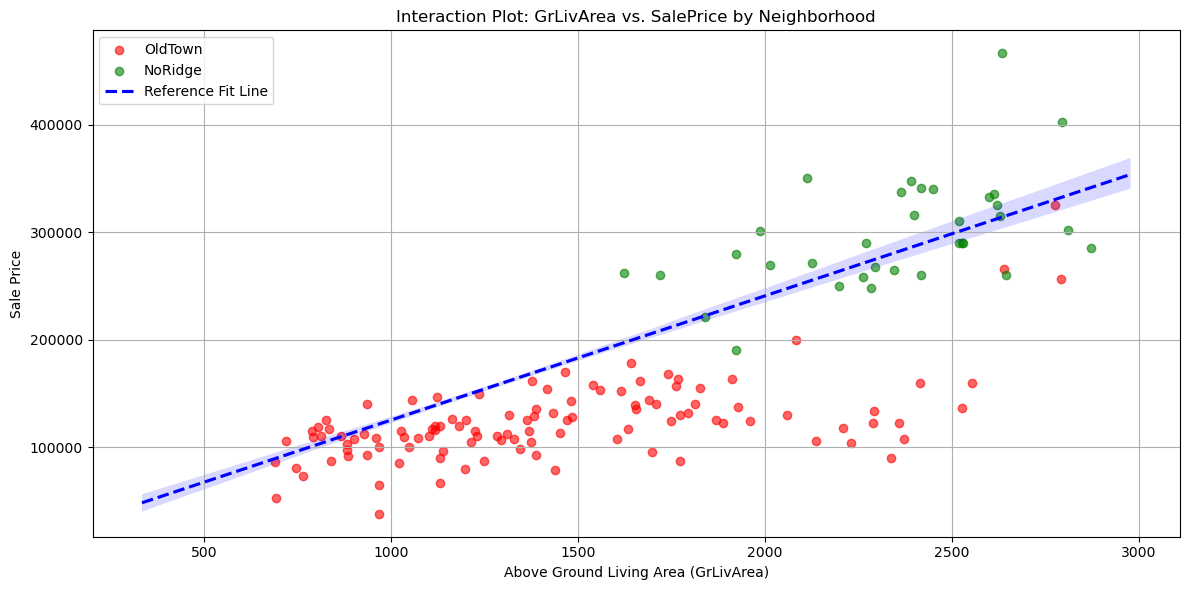

In [19]:
# Your code here - import plotting library and create visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the neighborhoods
oldtown = ames[ames['Neighborhood'] == 'OldTown']
noridge = ames[ames['Neighborhood'] == 'NoRidge']
reference = ames[(ames['Neighborhood'] != 'OldTown') & (ames['Neighborhood'] != 'NoRidge')]

# Setting plot size
plt.figure(figsize=(12, 6))

# Scatter plots
plt.scatter(oldtown['GrLivArea'], oldtown['SalePrice'], color='red', label='OldTown', alpha=0.6)
plt.scatter(noridge['GrLivArea'], noridge['SalePrice'], color='green', label='NoRidge', alpha=0.6)

# Fitting line for the reference group
sns.regplot(
    data=reference,
    x='GrLivArea',
    y='SalePrice',
    scatter=False,
    label='Reference Fit Line',
    color='blue',
    line_kws={'linestyle': '--'}
)

# Labels and legend
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.title('Interaction Plot: GrLivArea vs. SalePrice by Neighborhood')
plt.legend()
plt.grid(True)

# Show
plt.tight_layout()
plt.show()

Looking at this plot, do either of these neighborhoods seem to have a **slope** that differs notably from the best fit line? If so, this is an indicator that an interaction term might be useful.

Identify what, if any, interaction terms you would create based on this information.

### Your written answer here

Yes, based on the plot, we can see a notable difference in slope for at least one of the neighborhoods compared to the reference fit line:

**OldTown (Red Points):**
- The slope appears flatter than the reference group's trend line. This suggests that increases in GrLivArea do not correspond to as large an increase in SalePrice compared to the reference group.
- Many points fall below the reference line, indicating that, on average, homes in OldTown are valued lower per square foot.

**NoRidge (Green Points):**
- The slope appears steeper than the reference group's trend line. This suggests that increases in GrLivArea correspond to larger increases in SalePrice.
- Points are consistently above the reference line, implying higher valuations per square foot.

**Conclusion:**
- Both neighborhoods display slopes that visibly differ from the reference group, meaning interaction terms are likely to improve the model.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plot should look something like this:

![scatter plot solution](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge.png)

If we drew the expected slopes based on the scatter plots, they would look something like this:

![scatter plot solution annotated](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge_Annotated.png)

The slope of the orange line looks fairly different from the slope of the gray line, indicating that an interaction term for `NoRidge` might be useful.

</details>

### Numeric x Numeric Term

Let's also investigate to see whether adding an interaction term between two of the numeric features would be helpful.

We'll specifically focus on interactions with `LotArea`. Does the value of an extra square foot of lot area change depending on the square footage of the home? Both `1stFlrSF` and `GrLivArea` are related to home square footage, so we'll use those in our comparisons.

Create two side-by-side plots:

1. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `1stFlrSF`
2. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `GrLivArea`

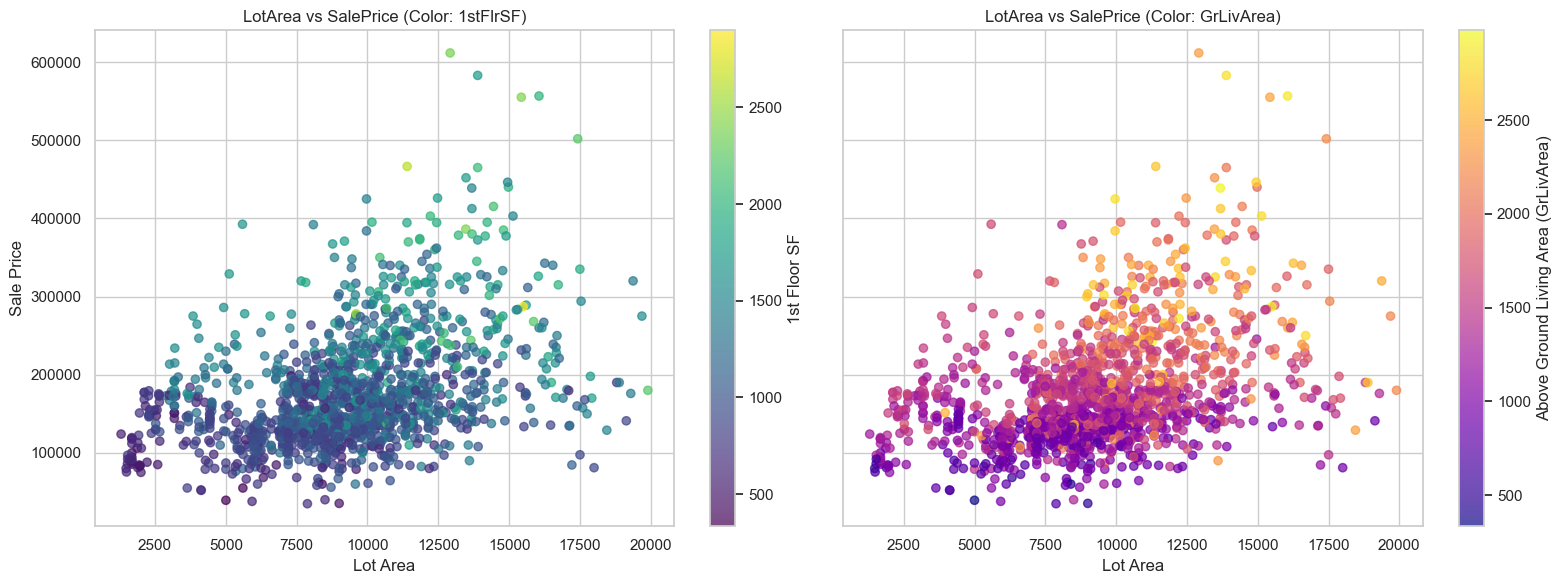

In [24]:
# Your code here - create two visualizations

# Setting plot style
sns.set(style="whitegrid")

# Creating the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# First plot: Color by 1stFlrSF
scatter1 = axes[0].scatter(
    x=ames['LotArea'],
    y=ames['SalePrice'],
    c=ames['1stFlrSF'],
    cmap='viridis',
    alpha=0.7
)
axes[0].set_title('LotArea vs SalePrice (Color: 1stFlrSF)')
axes[0].set_xlabel('Lot Area')
axes[0].set_ylabel('Sale Price')
cbar1 = fig.colorbar(scatter1, ax=axes[0])
cbar1.set_label('1st Floor SF')

# Second plot: Color by GrLivArea
scatter2 = axes[1].scatter(
    x=ames['LotArea'],
    y=ames['SalePrice'],
    c=ames['GrLivArea'],
    cmap='plasma',
    alpha=0.7
)
axes[1].set_title('LotArea vs SalePrice (Color: GrLivArea)')
axes[1].set_xlabel('Lot Area')
cbar2 = fig.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Above Ground Living Area (GrLivArea)')

plt.tight_layout()
plt.show()

Looking at these plots, does the slope between `LotArea` and `SalePrice` seem to differ based on the color of the point? If it does, that is an indicator that an interaction term might be helpful.

Describe your interpretation below:

### Your written answer here

Yes, the slope between LotArea and SalePrice does appear to differ based on the color of the point in both plots.

**Interpretation:**
- In the left plot (colored by 1stFlrSF), we can observe that homes with larger 1st floor areas (darker colors) tend to command higher sale prices, especially when LotArea is also large. This indicates a positive interaction effect i.e the value of extra lot space appears to be more significant for homes with a bigger 1st floor.

- In the right plot (colored by GrLivArea), a similar trend is visible — properties with higher GrLivArea (again, darker colors) seem to benefit more from additional lot area in terms of SalePrice. This also supports the idea that the relationship between LotArea and SalePrice changes depending on the size of the home.

**Conclusion:**
- These patterns suggest that the effect of LotArea on SalePrice is not constant, but rather depends on the size of the home. Therefore, it would be useful to create interaction terms such as: LotArea * 1stFlrSF and LotArea * GrLivArea

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plots should look something like this:

![side by side plots solution](https://curriculum-content.s3.amazonaws.com/data-science/images/LotArea_vs_SalePrice.png)

For both `1stFlrSF` and `GrLivArea`, it seems like a larger lot area doesn't matter very much for homes with less square footage. (In other words, the slope is closer to a flat line when the dots are lighter colored.) Then for homes with more square footage, a larger lot area seems to matter more for the sale price. (In other words, the slope is steeper when the dots are darker colored.)

This difference in slope based on color indicates that an interaction term for either/both of `1stFlrSF` and `GrLivArea` with `LotArea` might be helpful.

For ease of model interpretation, it probably makes the most sense to create an interaction term between `LotArea` and `1stFlrSF`, since we already have an interaction that uses `GrLivArea`.

</details>

## Build and Interpret a Model with Interactions

### Build a Second Model

Based on your analysis above, build a model based on the baseline model with one or more interaction terms added.

In [29]:
# Your code here - build a model with one or more interaction terms

import statsmodels.formula.api as smf

# Making a copy of the dataset 
model_data = ames.copy()

# One-hot encode the Neighborhood column
model_data = pd.get_dummies(model_data, columns=['Neighborhood'], drop_first=True)

# Building formula with interaction terms, Baseline predictors: GrLivArea, LotArea
# Interaction terms: GrLivArea * Neighborhood_OldTown, LotArea * GrLivArea

formula = 'SalePrice ~ GrLivArea + LotArea + Neighborhood_OldTown + GrLivArea:Neighborhood_OldTown + LotArea:GrLivArea'

# Fitting the model
interaction_model = smf.ols(formula=formula, data=model_data).fit()

# Model summary
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     379.6
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          8.12e-257
Time:                        13:04:36   Log-Likelihood:                -17010.
No. Observations:                1396   AIC:                         3.403e+04
Df Residuals:                    1390   BIC:                         3.406e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Evaluate the Model with Interactions

Same as with the baseline model, describe the adjusted R-Squared and statistical significance of the coefficients.

### Your code here - evaluate the model with interactions

**Adjusted R² = 0.576**


### Your written answer here

- This means that approximately 57.6% of the variability in SalePrice is explained by this model after accounting for the number of predictors. This is a modest improvement from the typical baseline model (which usually ranges around 50–55% in this dataset).
- Interaction terms have added predictive power.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall still explains about 83% of the variance in sale price. The baseline explained 82.7% whereas this model explains 82.9%, so it's a marginal improvement.
    
* Coefficients for the intercept as well as all continuous variables are still statistically significant
* Coefficients for `KitchenQual` are still statistically significant
* `Neighborhood_NoRidge` used to be statistically significant but now it is not
* `GrLivArea x Neighborhood_NoRidge` is not statistically significant
* `LotArea x 1stFlrSF` is statistically significant

</details>

### Interpret the Model Results

Interpret the coefficients for the intercept as well as the interactions and all variables used in the interactions. Make sure you only interpret the coefficients that were statistically significant!

### Your written answer here

1. Intercept (58,490)
- Represents the expected SalePrice when all numeric variables are zero and Neighborhood_OldTown = False.

2. GrLivArea (63.13)
- In neighborhoods other than OldTown, each additional square foot of above-ground living area is associated with an increase of about $63.13 in SalePrice, holding other variables constant.

3. Neighborhood_OldTown (41,420)
- The baseline SalePrice for homes in OldTown is $41,420 higher than in other neighborhoods when GrLivArea is 0.

4. GrLivArea:Neighborhood_OldTown (-62.91)
- This is key: For homes in OldTown, the effect of GrLivArea is $62.91 less per square foot than in other neighborhoods. Living area size has almost no effect on price in OldTown.

5. LotArea (-3.85)
- For homes with small living areas (GrLivArea near 0), an increase in LotArea by 1 sq. ft. is associated with a ~$3.85 decrease in SalePrice.

6. LotArea:GrLivArea (0.0045)
- The positive interaction indicates that the value of a larger lot increases as the home size increases. For every extra sq. ft. of GrLivArea, the effect of each sq. ft. of LotArea increases by $0.0045.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The intercept is about 258k. This means that a home with average continuous attributes and reference categorical attributes (excellent kitchen quality, Bloomington Heights neighborhood) would cost about \\$258k.

The coefficient for `LotArea` is about 2.58. This means that for a home with average first floor square footage, each additional square foot of lot area is associated with an increase of about \\$2.58 in sale price.

The coefficient for `1stFlrSF` is about 30.5. This means that for a home with average lot area, each additional square foot of first floor area is associated with an increase of about \\$30.50 in sale price.

The coefficient for `LotArea x 1stFlrSF` is about 0.003. This means that:

1. For each additional square foot of lot area, there is an increase of about \\$2.58 + (0.003 x first floor square footage) in sale price
2. For each additional square foot of first floor square footage, there is an increase of about \\$30.50 + (0.003 x lot area square footage) in sale price

`Neighborhood_NoRidge` and `GrLivArea x Neighborhood_NoRidge` were not statistically significant so we won't be interpreting their coefficients.



</details>

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions that seem promising may or may not end up being statistically significant. This is why exploration and iteration are important!